<div class="alert alert-info">
  <b> ЦЕЛЬ И ЗАДАЧИ ИССЛЕДОВАНИЙ </b>
    <a id="cond"></a> 
</div>

  ###  Исследование окупаемости рекламных вложений развлекательного ресурса Procrastinate Pro+.

   - Суть исследований состоит в том, чтобы разобраться в причинах неэффективности рекламных вливаний,
в результате которых ресурс терпит существенные убытки.
   - Задачей исследования является изучение бизнес-показателей развлекательного приложения Procrastinate Pro+
(коэффициенты удержания (RR), конверсии (CR), факторы 'пожизненной' ценности клиента (LTV), расходов на рекламу 
(САС) и окупаемости рекламных затрат (ROI)). 
   - Целью исследования является выявление совокупности факторов, приводящих к 
убыткам компании, и формирование предложений по преодолению финансовых проблем и выходу на уровень
окупаемости. 
   - В качестве исходных данных для исследования имеется набор табличных данных в формате .csv, со 
информацией о пользователях (страна, тип девайса, дата и стоимость покупок на сайте ресурса), а 
также о рекламных вливаниях (рекламный канал и стоимость рекламных кампаний).    
   - Проектное исследование состоит из следующих последовательных этапов: выгрузка и подготовка данных,
создание специальных функций для расчета и визуализации маркетинговых метрик (RR, CR, CAC, LTV, ROI),
анализ влияние на метрики переменных факторов, характеризующих пользователей (страна, девайс) и 
рекламные каналы (тип канала, сумма компании), комплексная оценка окупаемости рекламных кампаний и 
выдача рекомендаций по их оптимизации и повышению эффективности привлечения новых клиентов.  

### ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Загрузка данных из файлов .csv](#start)
2. [Подготовка данных](#analys)  
3. [Функция get_profiles()](#prof)
4. [Функция get_retention()](#ret)
5. [Функция get_conversion() ](#conv)
6. [Функция get_ltv()](#ltv)
7. [Функция filter_data()](#flt)
8. [Функция plot_retention()](#pret)
9. [Функция plot_conversion()](#pconv)
10. [Функция plot_ltv_roi()](#pltv)
11. [Диапазон дат привлечения пользователей](#date)
12. [Качество пользователей из разных стран](#qual)
13. [Устройства клиентов](#dev)
14. [Каналы привлечения клиентов](#chan)
15. [Маркетинг](#mark)
16. [Окупаемость рекламы](#rec)
17. [Вклад слабых измерений](#weak)
18. [Выводы](#conc)
19. [Рекомендации](#review)

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  
    pd.read_csv('/datasets/orders_info_short.csv'),   
    pd.read_csv('/datasets/costs_info_short.csv'),  
)

<div class="alert alert-info">
  <b> ПОДГОТОВКА ДАННЫХ </b>
    <a id="analys"></a> 
</div>

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [6]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [7]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [8]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [9]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [10]:
type = []
f = [visits['Session Start'], visits['Session End'], orders['Event Dt'], costs['dt']]
for i in f:
    type.append(i.dtype)
print(type)

[dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('O')]


In [11]:
print(np.dtype('datetime64[ns]') == np.dtype('<M8[ns]'))

True


In [12]:
duplicates = []
f = [visits, orders, costs]
for i in f:
    duplicates.append(i.duplicated().sum())
print(duplicates)

[0, 0, 0]


<div class="alert alert-info">
  Все таблицы с исходными данными не имеют пропусков и дублирующих строк. За исключением столбцов с временем и датами все остальные
данные имеют правильный тип. Временные данные приведены к типe 'datetime64'. 
</div>

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

<div class="alert alert-info">
  Функция get_profiles(). Данная функция сторится на основе данных о посещения сайта (sessions),
выполненных покупках на сайте (orders) и данных о рекламных компаниях (costs). В результате 
формируется профиль клиентов, содержащий информацию о дате первого посещения сайта, а также 
рекламных расходах в пересчете на одного клиента (CAC).
<a id="prof"></a> 
</div>

In [13]:
def get_profiles(sessions, orders, costs):
    profiles = (
        sessions.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg(
            {
                'Session Start': 'first',
                'Channel': 'first',
                'Device': 'first',
                'Region': 'first',
            }
        )
        .rename(columns={'Session Start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['payer'] = profiles['User Id'].isin(orders['User Id'].unique())
    new_users = (
        profiles.groupby(['dt', 'Channel'])
        .agg({'User Id': 'nunique'})
        .rename(columns={'User Id': 'unique_users'})
        .reset_index()
    )
    costs = costs.merge(new_users, on=['dt', 'Channel'], how='left')
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    profiles = profiles.merge(
        costs[['dt', 'Channel', 'acquisition_cost']],
        on=['dt', 'Channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [14]:
profiles = get_profiles(visits, orders, costs)
print(profiles[:5])

    User Id            first_ts     Channel  Device         Region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt  payer  acquisition_cost  
0  2019-05-07   True          1.088172  
1  2019-07-09  False          1.107237  
2  2019-10-01  False          0.000000  
3  2019-08-22  False          0.988235  
4  2019-10-02  False          0.230769  


<div class="alert alert-info">
  Функция get_retention() - коэффициент удержания (RR)
<a id="ret"></a> 
</div>

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        sessions[['User Id', 'Session Start']], on='User Id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['Session Start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [16]:
date = datetime(2019, 10, 19).date()
prof_raw, retention, retention_time = get_retention(profiles, visits, date, 7, dimensions=[])
print(retention[:7])

       cohort_size    0         1        2         3         4         5  \
payer                                                                      
False       129913  1.0  0.176972  0.08625  0.051565  0.034377  0.024355   
True          8140  1.0  0.406020  0.31683  0.259951  0.228624  0.209828   

              6  
payer            
False  0.018289  
True   0.189558  


<div class="alert alert-info">
  Функция get_conversion() - коэффициент конверсии (CR)
<a id="conv"></a> 
</div>

In [17]:
def get_conversion(
    profiles,
    oders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        orders.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg({'Event Dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['User Id', 'Event Dt']], on='User Id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    if 'cohort' in dimensions: 
        dimensions = []
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return result_raw, result_grouped, result_in_time 

In [18]:
prof_raw, conversion, conversion_time = get_conversion(profiles, orders, datetime(2019,9,5).date(), 7, dimensions=[])
print(retention[:7])

       cohort_size    0         1        2         3         4         5  \
payer                                                                      
False       129913  1.0  0.176972  0.08625  0.051565  0.034377  0.024355   
True          8140  1.0  0.406020  0.31683  0.259951  0.228624  0.209828   

              6  
payer            
False  0.018289  
True   0.189558  


<div class="alert alert-info">
  Функция get_ltv() - коэффициенты пожизненной ценности (LTV), расходов на рекламу (CAC), окупаемости рекламы (ROI).
<a id="ltv"></a> 
</div>

In [19]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['User Id', 'Event Dt', 'Revenue']], on='User Id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='Revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['User Id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw, 
        result_grouped, 
        result_in_time,  
        roi_grouped,  
        roi_in_time, 
    ) 

In [20]:
prof_raw, ltv, ltv_time, roi, roi_time = get_ltv(profiles, orders, datetime(2019,9,21).date(), 7, dimensions=[])
print(roi_time[:5])

            cohort_size       cac       0.0       1.0       2.0       3.0  \
dt                                                                          
2019-05-01          909  0.335336  0.478020  0.641723  0.775966  0.877469   
2019-05-02          758  0.304545  0.518790  0.994737  1.102818  1.254132   
2019-05-03          849  0.309859  0.534915  0.804273  1.054662  1.225377   
2019-05-04         1015  0.332020  0.699169  0.862047  0.950890  1.084184   
2019-05-05          970  0.329799  0.427439  0.696019  0.742814  0.805208   

                 4.0       5.0       6.0  
dt                                        
2019-05-01  0.942950  0.942950  0.975691  
2019-05-02  1.340597  1.448721  1.491953  
2019-05-03  1.624054  1.775839  1.794807  
2019-05-04  1.383561  1.561246  1.590861  
2019-05-05  0.883200  0.961192  1.007987  


<div class="alert alert-info">
  Функция filter_data() определения скользящего среднего для сглаживания данных в столбцах df
<a id="flt"></a> 
</div>

In [21]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

<div class="alert alert-info">
  Функция plot_retention() для визуализации коэффициента удержания (RR) и его динамики
<a id="pret"></a> 
</div>

In [22]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.legend(loc = 'upper right', title = 'Канал', fontsize = 14)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

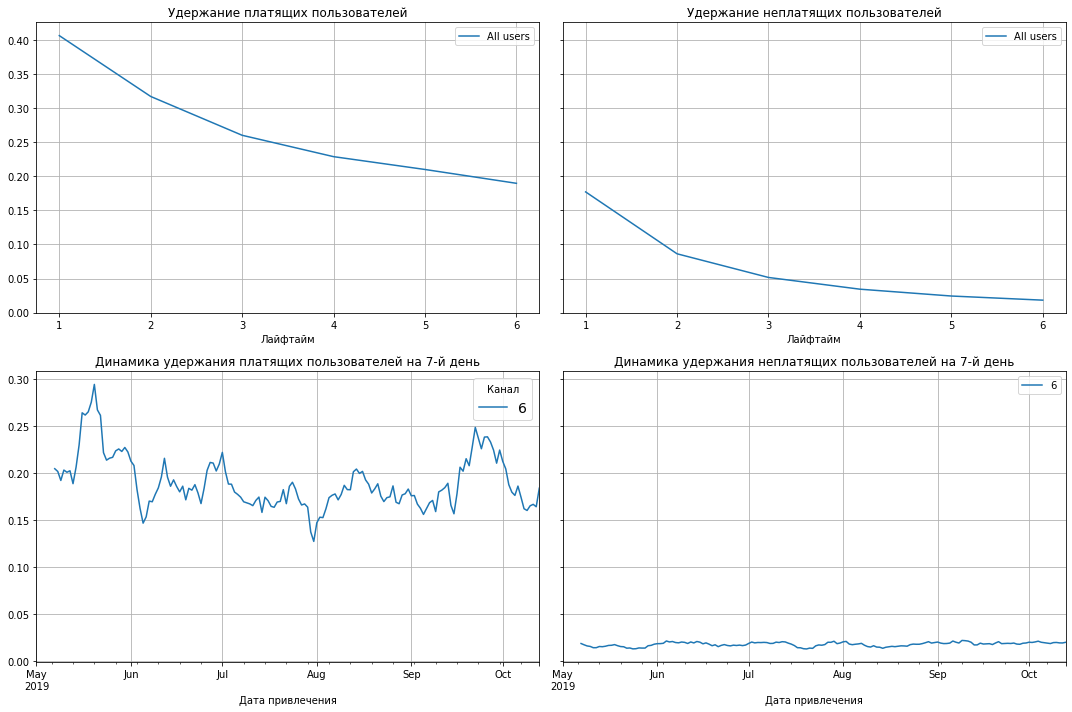

In [23]:
plot_retention(retention, retention_time, 7)

<div class="alert alert-info">
  Функция plot_conversion() для визуализации коэффициента конверсии (CR) и его динамики
<a id="pconv"></a> 
</div>

In [24]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))
    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

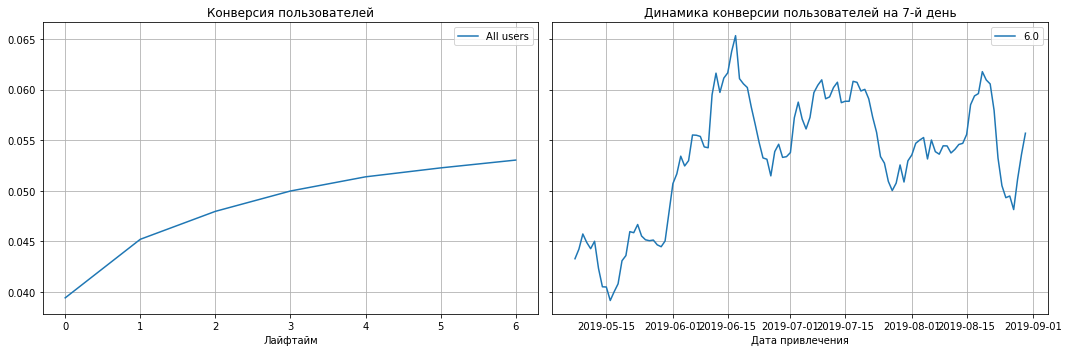

In [25]:
plot_conversion(conversion, conversion_time, 7, window=7)

<div class="alert alert-info">
  Функция plot_ltv_roi() для визуализации метрик 'пожизненной' ценности клиента (LTV), расходов на рекламу (CAC) и окупаемости
рекламных вложений (ROI). 
<a id="pltv"></a>
</div>

In [26]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))
    
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

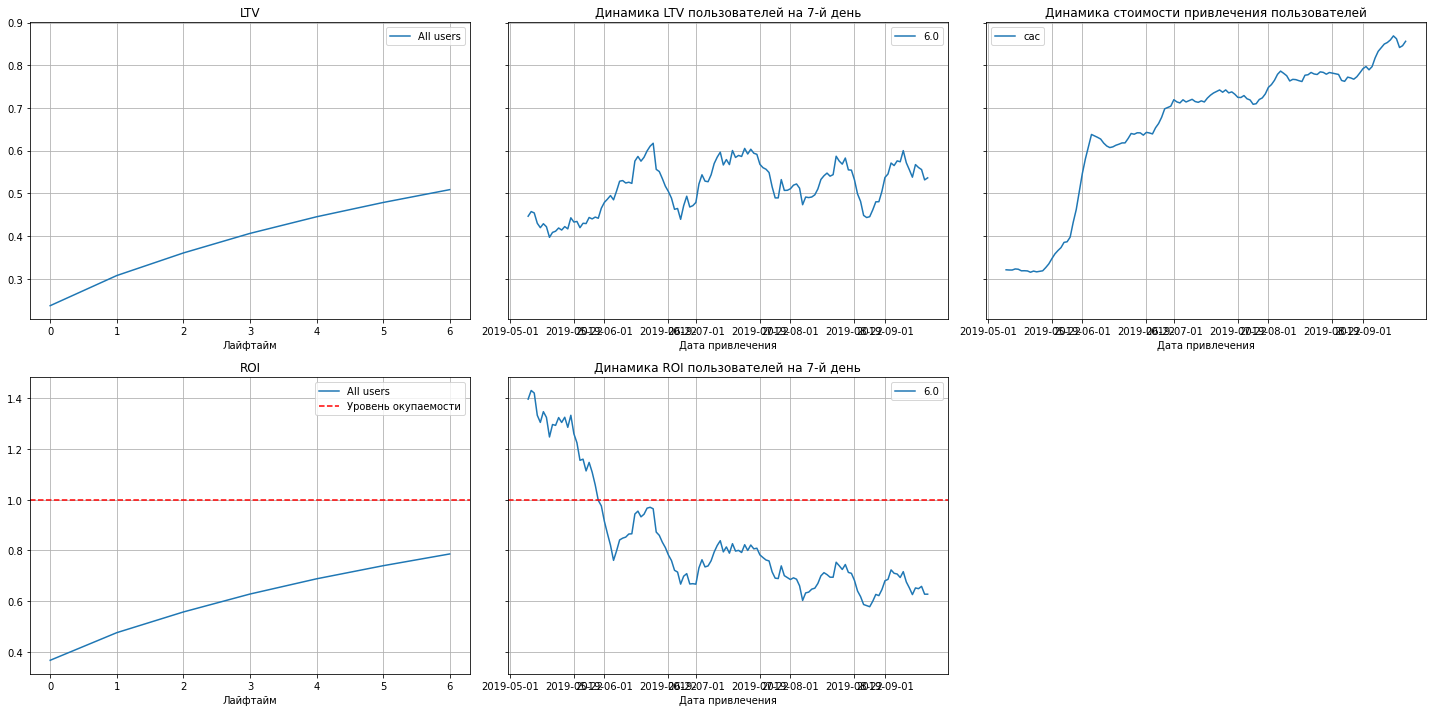

In [27]:
plot_ltv_roi(ltv, ltv_time, roi, roi_time, 7, window=7)

<div class="alert alert-info"> 

### 1 Диапазон дат привлечения пользователей.  
<a id="date"></a>
</div>

In [28]:
profiles = get_profiles(visits, orders, costs)
profiles[:3]

,User Id,first_ts,Channel,Device,Region,dt,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,False,0.000000


In [29]:
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [30]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

<div class="alert alert-info"> 
  В столбце 'dt' находится информация о датах первого посещения ресурса пользователями. Соответственно, минимальное и 
максимальное значение дает диапазон дат привлечения клиентов: 01.05.2019 г. - 27.10.2019 г. Этот 
диапазон дат совпадает с заданеием к проекту.
</div>

<div class="alert alert-info"> 

### 2 Качество пользователей из разных стран. 
<a id="qual"></a>
</div>

In [31]:
profiles['Region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [32]:
prof_pay = profiles.query('payer == True')
prof_pay.groupby('Region').agg({'User Id':'nunique'}).sort_values(by = 'User Id', ascending = False)

,User Id
Region,
United States,6902
UK,700
France,663
Germany,616


In [33]:
country = profiles.groupby(['Region']).agg({'User Id':'count'}).rename(columns={'User Id': 'Число клиентов'})

In [34]:
prof = profiles.groupby(['Region']).agg({'payer':'mean'}).rename(columns={'payer': 'Доля платящих'})

In [35]:
number = country.merge(prof, on=['Region']).sort_values(by='Число клиентов', ascending = False)
number

,Число клиентов,Доля платящих
Region,,
United States,100002,0.069019
UK,17575,0.039829
France,17450,0.037994
Germany,14981,0.041119


<div class="alert alert-info"> 
     В данных представлены клиенты из 4 стран: США, Германии, Франции и Англии. Больше всего клиентов из США (100 тыс.), 
меньше всего из Германии (почти 15 тыс.). При этом, самая большая доля платящих клиентов в США (6,9 %), Германия на 2 месте 
(4,1 %), а самая маленькая доля платящих клиентов во Франции - 3,8 %.
</div>

<div class="alert alert-info"> 

### 3 Устройства клиентов. 
<a id="dev"></a>
</div>

In [36]:
profiles['Device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [37]:
profiles.query('payer == True').groupby('Device').agg({'User Id':'nunique'}).sort_values(by='User Id', ascending = False)

,User Id
Device,
iPhone,3382
Android,2050
Mac,1912
PC,1537


In [38]:
prof_device = profiles.groupby(['Device']).agg({'payer':'mean'}).rename(columns={'payer': 'Доля платящих'})

In [39]:
device_total = profiles.groupby(['Device']).agg({'User Id':'count'}).rename(columns={'User Id': 'Число клиентов'})

In [40]:
number_device = device_total.merge(prof_device, on='Device').sort_values(by='Число клиентов', ascending = False)
number_device

,Число клиентов,Доля платящих
Device,,
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468
Mac,30042,0.063644


<div class="alert alert-info"> 
     Клиенты используют 4 вида устройств: iPhone, Android, PC и Mac. Больше всего клиентов используют iPhone (почти 54,5 тыс.), 
меньше всего - Mac (около 30 тыс.). При этом, самая большая доля платящих клиентов использует Mac (6,4 %), iPhone занимает
2 место (6,2 %), а самая маленькая доля платящих клиентов использует PC - 5 %.
</div>

<div class="alert alert-info"> 

### 4 Каналы привлечения клиентов. 
<a id="chan"></a>
</div>

In [41]:
profiles.query('payer == True').groupby('Channel').agg({'User Id':'nunique'}).sort_values(by='User Id', ascending = False)

,User Id
Channel,
FaceBoom,3557
TipTop,1878
organic,1160
WahooNetBanner,453
AdNonSense,440
RocketSuperAds,352
LeapBob,262
OppleCreativeMedia,233
lambdaMediaAds,225


In [42]:
channel_total = profiles.groupby('Channel').agg({'User Id':'nunique'}).rename(columns={'User Id': 'Число клиентов'})

In [43]:
prof_channel = profiles.groupby('Channel').agg({'payer':'mean'}).rename(columns={'payer': 'Доля платящих'})

In [44]:
number_channel = channel_total.merge(prof_channel, on='Channel').sort_values(by='Доля платящих', ascending = False)
number_channel

,Число клиентов,Доля платящих
Channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


<div class="alert alert-info"> 
  Всего используется 10 каналов привлечения клиентов. Каналы, привлекшие больше всего платящих пользователей,: FaceBoom (3557) 
и TipTop (1878). Количество платящих пользователей 'organic' (самотек) на 3 месте (1160). Самые эффективные каналы по величине
доли платящих клиентов: FaceBoom - 12,2%, AdNonSense - 11.3% и ambdaMediaAds - 10,5%. Наименее эффективные каналы: OppleCreativeMedia -
2,7 % и organic - 2%.
</div>

<div class="alert alert-info"> 

### 4 Маркетинег 
<a id="mark"></a>
</div>

In [45]:
costs['costs'].sum()

105497.30000000002

<div class="alert alert-info"> 
  Общая сумма расходов на рекламу составляет 105497,3 уе
</div>

In [46]:
cost_val = costs.groupby('Channel').agg({'costs':'sum'}).sort_values(by='costs', ascending = False)
cost_sum = cost_val['costs'].sum()
cost_val['ratio'] = round(cost_val['costs']*100/cost_sum,1)
cost_val

,costs,ratio
Channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


<div class="alert alert-info"> 
  Самые большие расходы на рекламу идут через канал TipTop (54751,3), что составляет 51,9 % от 
общей суммы рекламных расходов. На втором месте FaceBoom (32445,6) - 30,8 %, на третьем -
WahooNetBanner (5151) - 4,9 %. Меньше всего вложений в канал YRabbit (944,22) - 0,9 %.
</div>

In [47]:
costs['weeks'] = pd.to_datetime(costs['dt']).dt.week 
costs['months'] = pd.to_datetime(costs['dt']).dt.month
costs[:20]
cost_time_m = costs.pivot_table(index = ['months'], columns = 'Channel', values = 'costs', aggfunc = 'sum')
cost_time_m[:5]

/tmp/ipykernel_360/2488580892.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  costs['weeks'] = pd.to_datetime(costs['dt']).dt.week


Channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
months,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


In [48]:
cost_time_w = costs.pivot_table(index = ['weeks'], columns = 'Channel', values = 'costs', aggfunc = 'sum')
cost_time_w[:5]

Channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
weeks,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


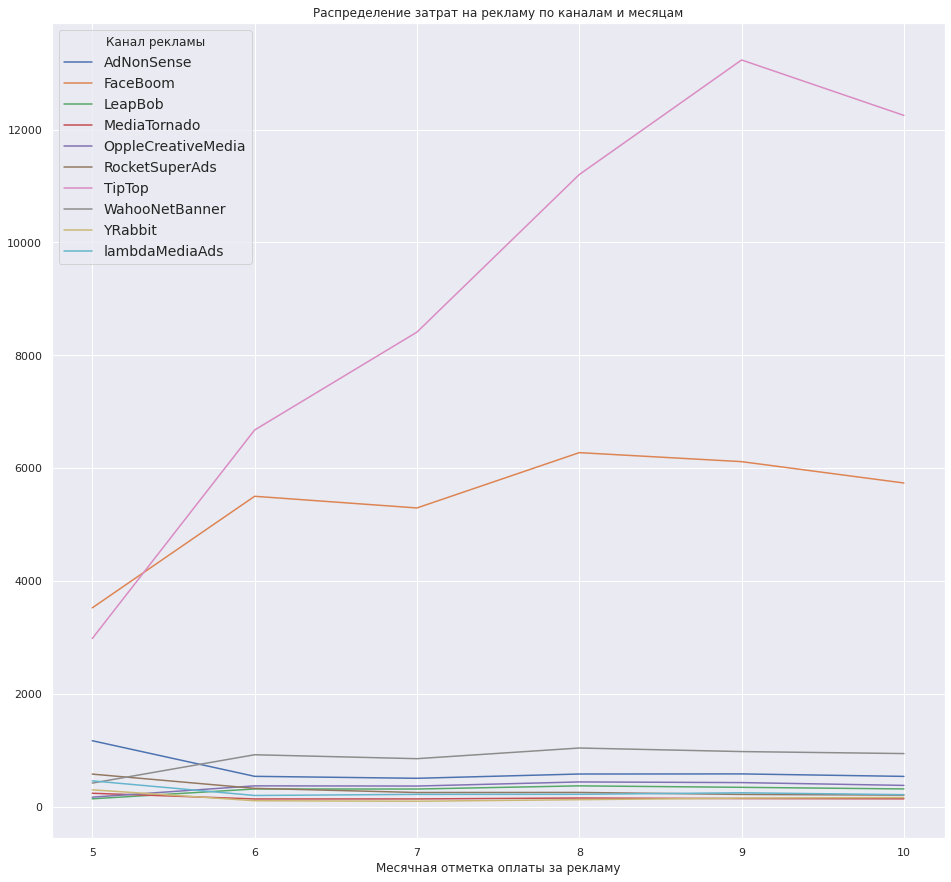

In [49]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,15)})
cost_time_m.plot(grid=True)
plt.xlabel('Месячная отметка оплаты за рекламу')
plt.title('Распределение затрат на рекламу по каналам и месяцам')
plt.legend(loc = 'upper left', title = 'Канал рекламы', fontsize = 14)
plt.show() 


<div class="alert alert-info"> 
  На общем графике распределения рекламных затрат по времени и каналам видно, что рекламные 
вложения через каналы Tip-Top и FaceBoom на порядок превосходят вложения через все прочие каналы.
На месячных графиках видно, что вливания в Tip-Top и FaceBoom в первые 4 месяца наблюдаемого периода
растут, а в последний пятый месяц практически не изменяются (а для канала Tip-Top немного снижаются).

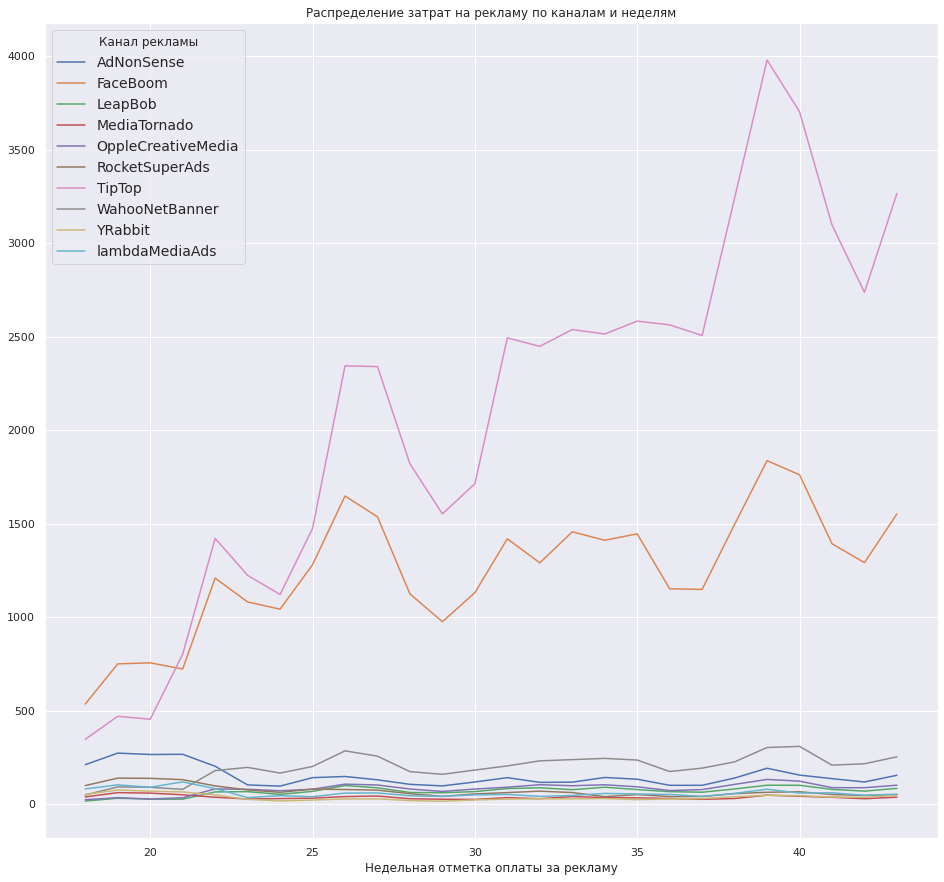

In [50]:
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,15)})
cost_time_w.plot(grid=True)
plt.xlabel('Недельная отметка оплаты за рекламу')
plt.title('Распределение затрат на рекламу по каналам и неделям')
plt.legend(loc = 'upper left', title = 'Канал рекламы', fontsize = 14)
plt.show() 

<div class="alert alert-info"> 
   Для всех каналов очевидна 'периодичность' вложений: на недельном графике выделяются минимумы
вложений на границе месячного деления: 20, 24, 29, 37 и 45 недели. Таким образом, минимумы 
разделяет промежуток 4 - 5 недель (в первые 2 месяца) и 7 - 8 недель (в последние 3 месяца). Между
минимумами выделяются максимумы вложений, соответствующие ориентировочно серединам месячных/
двухмесячных циклов. 
</div>

In [51]:
profiles[:3]

,User Id,first_ts,Channel,Device,Region,dt,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,False,0.000000


In [52]:
cost_sum = costs.groupby('Channel').agg({'costs':'sum'})
prof_cac = profiles.groupby('Channel').agg({'acquisition_cost':'mean'})
prof_cac = prof_cac.merge(cost_sum, on=['Channel'], how = 'left').sort_values(by='acquisition_cost', ascending = False)
prof_cac

,acquisition_cost,costs
Channel,,
TipTop,2.799003,54751.30
FaceBoom,1.113286,32445.60
AdNonSense,1.008054,3911.25
lambdaMediaAds,0.724802,1557.60
WahooNetBanner,0.602245,5151.00
RocketSuperAds,0.412095,1833.00
OppleCreativeMedia,0.250000,2151.25
YRabbit,0.218975,944.22
MediaTornado,0.218717,954.48


<div class="alert alert-info"> 
   Удельные рекламные затраты (САС), усредненные для каждого рекламного канала, распределяются в относительном соответствии с
общими рекламными затрами на каждый канал.  Так, самые крупные по финансовым вливаниям каналы (TipTop и FaceBoom) имеют наиболее
высокий показатель CAC: 2,8 и 1,11, соответственно. Третий по суммам вливания канал WahooNetBanne (5151) имеет средний CAC - 0,6.
Из каналов, входящих в топ-7 по объему вливания средств наиболее интересны OppleCreativeMedia (5 место) и LeapBob (7 место), 
которые имеют относительно низкие значения САС - 0,25 и 0,21, соответственно. 
</div>

In [53]:
prof_cac['cac_'] = 1/(prof_cac['acquisition_cost']*prof_cac['costs'])
cac_range =prof_cac.sort_values(by='cac_', ascending = False)
cac_range['avg_cac'] = cac_range['acquisition_cost'].mean()
cac_range

,acquisition_cost,costs,cac_,avg_cac
Channel,,,,
YRabbit,0.218975,944.22,0.004837,0.687032
MediaTornado,0.218717,954.48,0.004790,0.687032
LeapBob,0.210172,1797.60,0.002647,0.687032
OppleCreativeMedia,0.250000,2151.25,0.001859,0.687032
RocketSuperAds,0.412095,1833.00,0.001324,0.687032
lambdaMediaAds,0.724802,1557.60,0.000886,0.687032
WahooNetBanner,0.602245,5151.00,0.000322,0.687032
AdNonSense,1.008054,3911.25,0.000254,0.687032
FaceBoom,1.113286,32445.60,0.000028,0.687032


<div class="alert alert-info"> 
   Эффективность ренкламной кампании тем выше, чем меньше вложения в рекламу и чем ниже САС (расходы на привлечение 1 клиента).
Средняя величина CAC составляет 0,687, что ближе всего к величине CAC канала lambdaMediaAds. Величина
CAC самого 'дорогого' канала Tip-Top (2,8) в 4 раза выше среднего.
Таким образом, можно сравнить эффективность каналов в моменте, рассчитав удельный САС (величина обратная произведению общих 
вливаний в канал и его САС). То есть, удельный САС имеет смысл отношения размера когорты на квадрат объема финансовых вливаний.
    Наибольшый удельный САС имеют небольшие каналы, которые замыкали список по объемам вливаний: YRabbit и MediaTornado -
0,00484 и 0,00479, соответственно. Наиболее крупные каналы (TipTop и FaceBoom) имеют самый низкий удельный САС
(0,000007 и 0,000028, соответственно),то есть характеризуются самой низкой эффективностью. Однако, удельный САС имеет смысл 
только 'в моменте', так как не исключено, что при увеличении вливаний в каналы с максимальным значением удельного САС 
(YRabbit и MediaTornado) его величина начнет непропорционально снижаться. Это возможно, если САС не является постоянной
величиной для данного канала и повышается пропорционально размеру привлеченной когороты
</div>

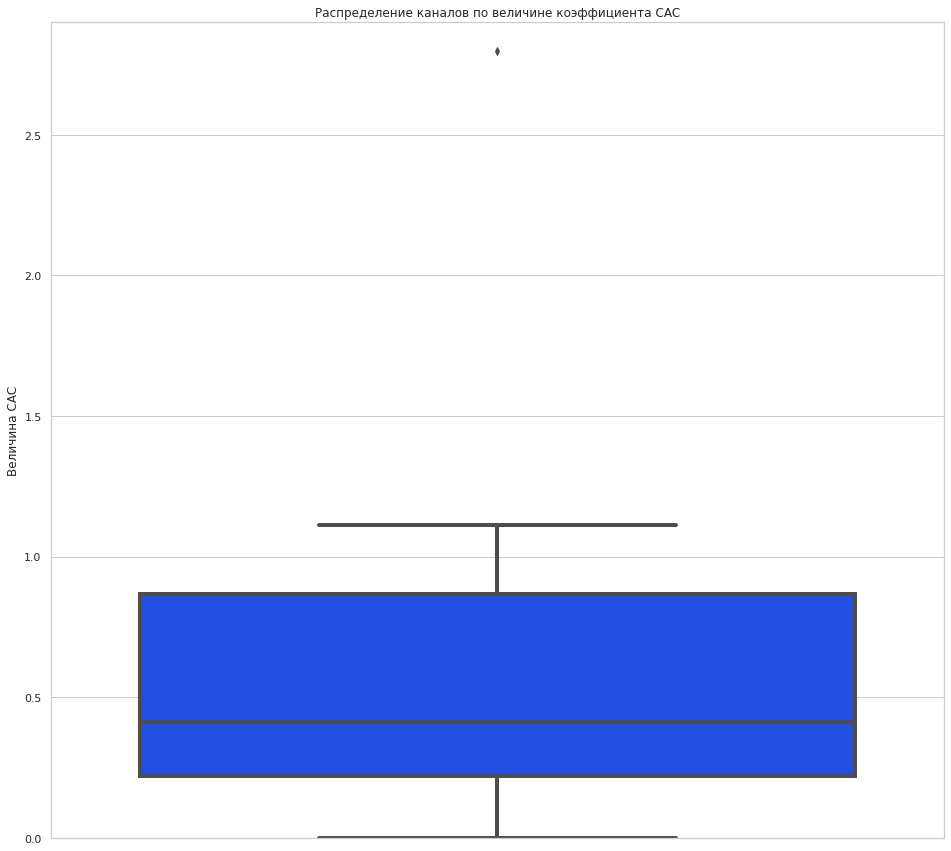

In [54]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.boxplot(y = 'acquisition_cost', data = cac_range, linewidth = 4)
sns.set(rc={'figure.figsize':(16,8)})
ax.set (ylim = (0,2.9),
        ylabel='Величина CAC',
        title='Распределение каналов по величине коэффициента CAC')  

plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info"> 
   Распределение каналов по величине CAC свидетельствует о выпадении точки, соответствующей 
каналу Tip-Top, величина CAC которого в 4 раза превышает среднее значение данного показателя 
(и более, чем в 5 раз превышает медианный CAC). Это свидетельствует о явной переоценке данного
канала, вливания в который в таких объемах вряд ли можно считать разумными.

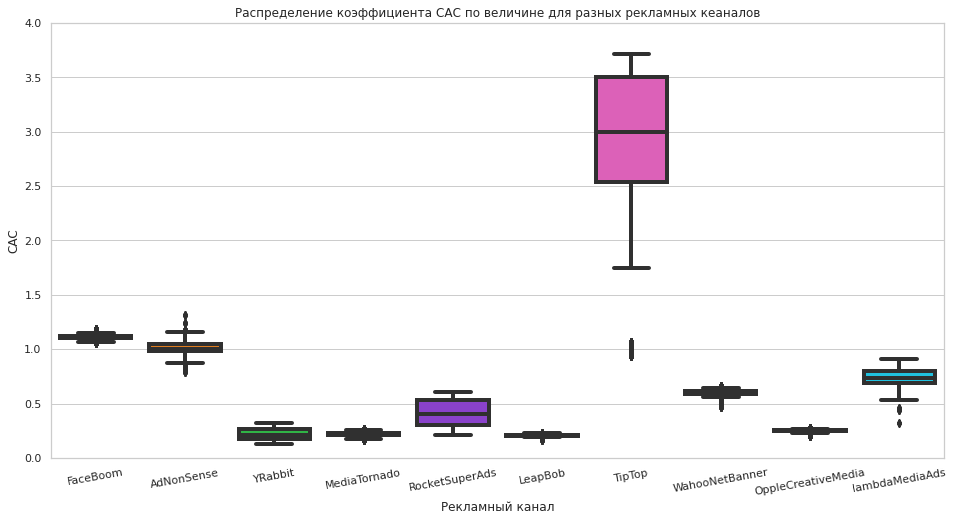

In [55]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.boxplot(x = 'Channel', y = 'acquisition_cost', data = profiles.query('Channel!="organic"'), linewidth = 4)
sns.set(rc={'figure.figsize':(16,8)})
ax.set (xlabel='Рекламный канал', ylim = (0,4),
        ylabel='CAC',
        title='Распределение коэффициента САС по величине для разных рекламных кеаналов')  

plt.xticks(rotation = 10)
plt.show()

<div class="alert alert-info"> 
   Приведено распределение САС для разных рекламных каналов. Видно, что медианное значение САС ждя
канала Tip-Top в 3 - 5 раз большей медианных значений САС для других каналов

### Окупаемость рекламы
<a id="rec"></a>

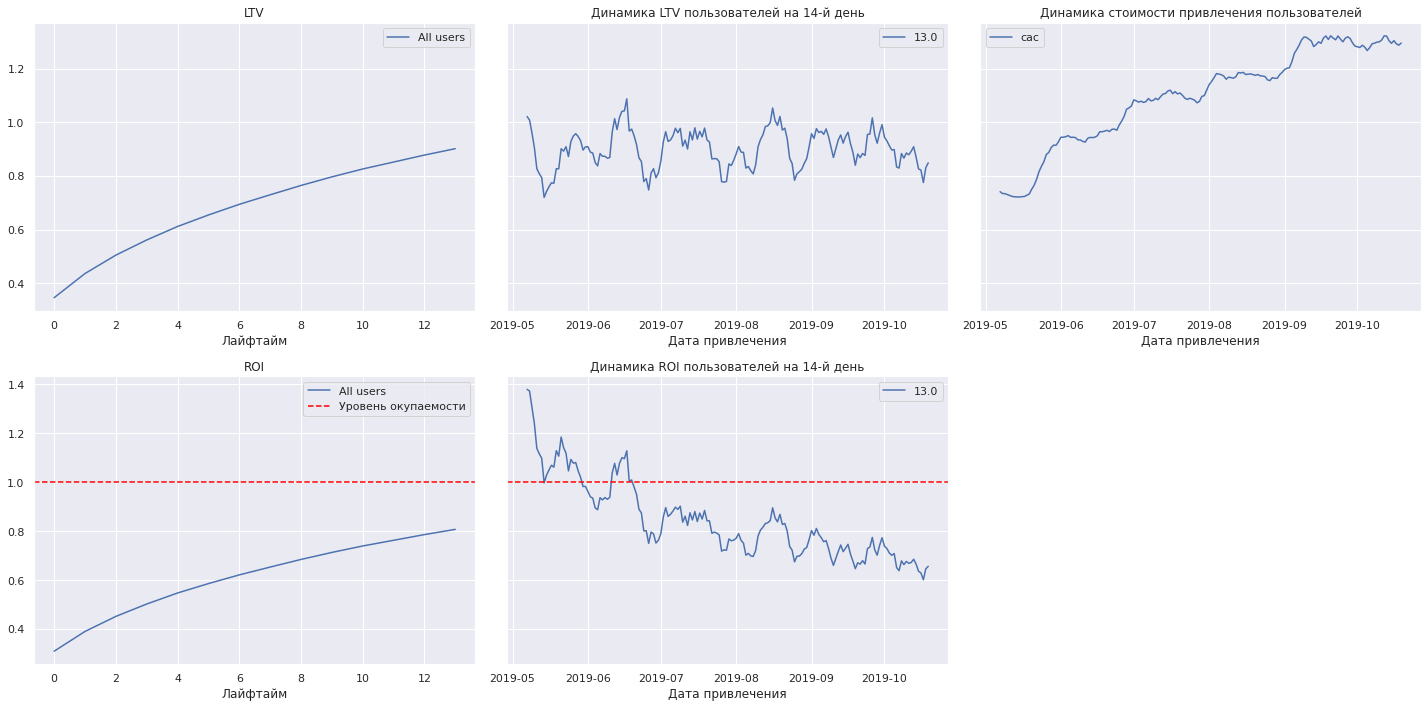

In [56]:
prof_raw, ltv, ltv_time, roi, roi_time = get_ltv(profiles.query('Channel!="organic"'), orders, datetime(2019,11,1).date(), 14, dimensions=[])
plot_ltv_roi(ltv, ltv_time, roi, roi_time, 14, window=7)

<div class="alert alert-info"> 
  График изменения ROI показывает, что окупаемость рекламы через 14 дней не достигается. Однако, динамика ROI на конец 2 недели 
(13 лайф-тайм) свидетельствует, что для когорот, сформированных в начале срока наблюдений (с мая по конец июня 2019 г.) рекламные
вложения через 14 дней окупаются с хорошим запасом. Однако, начиная с июля и по конец периода наблюдений (октябрь) ROI на 14 день
ниже 1 и стабильно снижается. Так как LTV, в целом, за период меняется мало (колебания только в пределах месяца), то снижение ROI, 
наблюдаемое с мая по октябрь, связано с ростом рекламных затрат (CAC), максимальный рост которых пришелся на период с мая по июнь.
С июля по октябрь CAC продолжил рост, что коррелирует с соответствующим монотонным снижением ROI. 
</div>

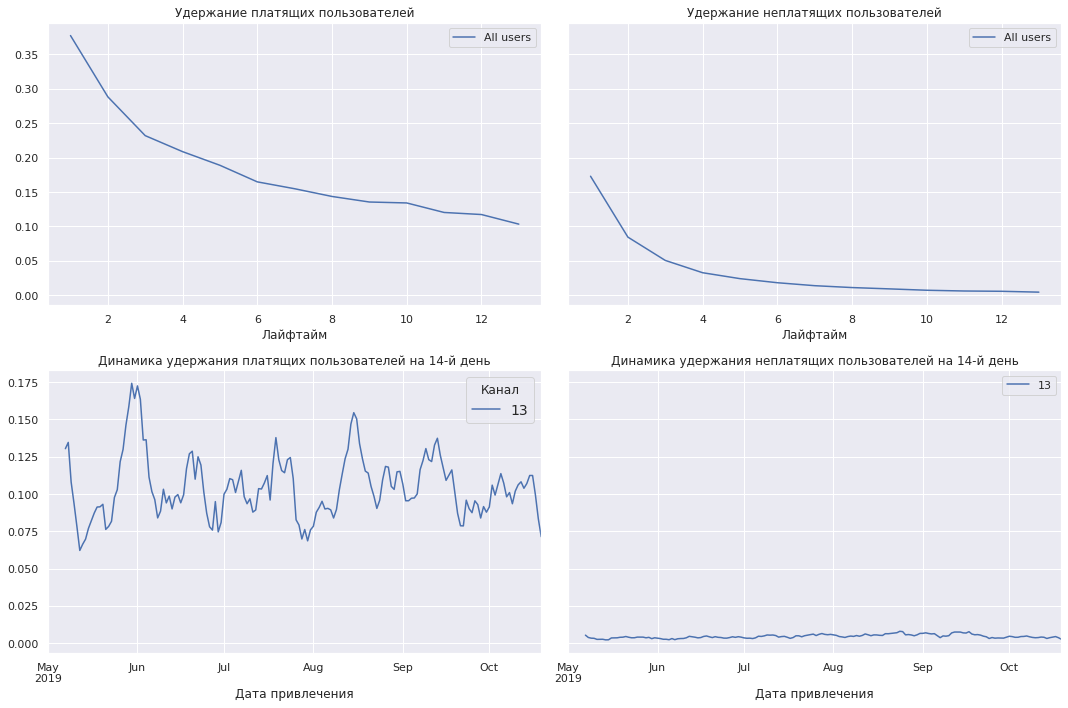

In [57]:
prof_raw, retention, retention_time = get_retention(profiles.query('Channel!="organic"'), visits.query('Channel!="organic"'), datetime(2019,11,1).date(), 14, dimensions=[])
plot_retention(retention, retention_time, 14, window = 7)

<div class="alert alert-info"> 
  Коэффициент удержания (RAR) существенно выше для платящих пользователей и на 14 день в среднем по всем датам привлечения 
остается в интервале 10 - 15 %. Для неплотящих пользователей RAR через неделю падает до 0.  
</div>

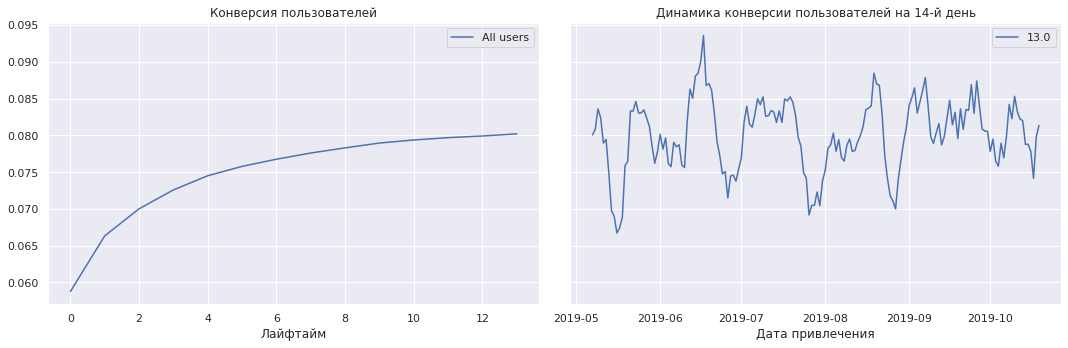

In [58]:
prof_raw, conversion, conversion_time = get_conversion(profiles.query('Channel!="organic"'), orders, datetime(2019,11,1).date(), 14, dimensions=[])
plot_conversion(conversion, conversion_time, 14, window=7)

<div class="alert alert-info"> 
  Конверсия пользователей (CR) через 10 - 12 дней практически выходит на плато и составляет порядка 5,7 - 5,8 %. При этом, данные
динамики CR показывают, что в мае конверсия 14 дня имела нетипично низкие значения: от 4 до 5 %. В ставшееся время (июль-октябрь)
конверсия находится в интервале 5,5 - 6,5 %.
</div>

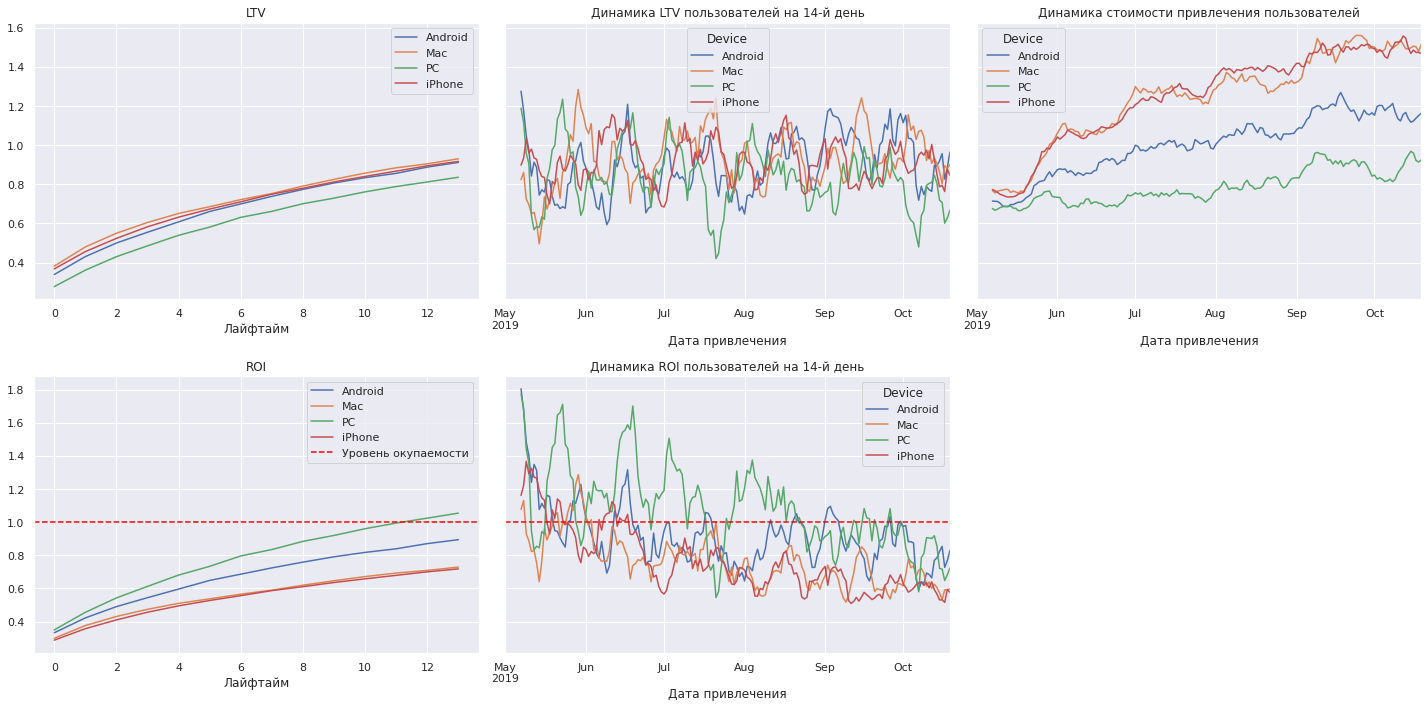

In [59]:
prof_raw, ltv, ltv_time, roi, roi_time = get_ltv(profiles.query('Channel!="organic"'), orders, datetime(2019,11,1).date(), 14, dimensions=['Device'])
plot_ltv_roi(ltv, ltv_time, roi, roi_time, 14, window=7)

<div class="alert alert-info"> 
  При разбивке метрик по девайсам видно, что затраты на рекламу для пользователей PC окупаются
12 день, в то время как расходы на пользователей Android, iPhone и Mac не окупаются в 2-недельный период. Графики динамики CAC и ROI 
показывают, что окупаемость рекламы, в общем, обратнопропорциональна рекламным вложениям (CAC): раньше всего окупаются вложения
в PC, которые минимальны из всех девайсов, затем, по-видимому, окупились бы вложения в Android (на 15 - 16 лайф-тайм), которые имеют
средний уровень, а вложения в iPhone и Mac, которые были максимальны из всех устройств, полностью 
не окупаются. Вместе с тем, в мае и июне рекламные вложения окупались для Android, так как величина таких вложений была минимальна
за весь период наблюдений (в 2 - 2,5 раза ниже, чем в остальной период с июля по октябрь). Вливания 
в iPhone и Mac не окупаются за весь период наблюдений.
</div>

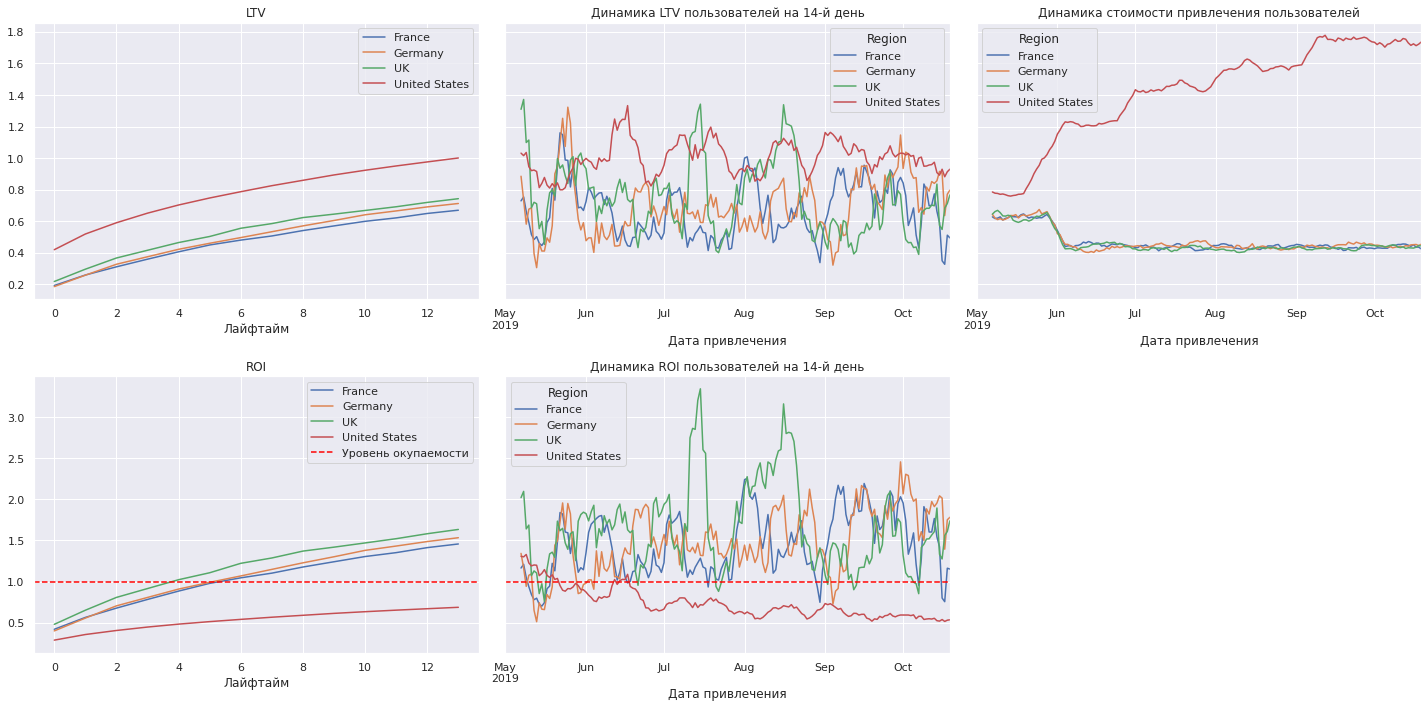

In [60]:
prof_raw, ltv, ltv_time, roi, roi_time = get_ltv(profiles.query('Channel!="organic"'), orders, datetime(2019,11,1).date(), 14, dimensions=['Region'])
plot_ltv_roi(ltv, ltv_time, roi, roi_time, 14, window=7)

<div class="alert alert-info"> 
  На графиках метрик с разбивкой по странам видно, что реклама для всех стран, за исключением США окупается на 5 - 6 день. Для
США окупаемости на 14 день добиться не удается. По-видимому, низкая окупаемость рекламы в США связана с очень большими рекламными
расходами, колторые в 5 - 6 раз выше, чем для всех остальных стран. Причем в мае, когда расходы на рекламу для всех стран были 
примерно близки, величина ROI для США на 14 день также была выше 1. Причем, начиная с мая расходы на
рекламу во всех стиранах снизились, а в США продолжают расти в течение всего периода наблюдений.
</div>

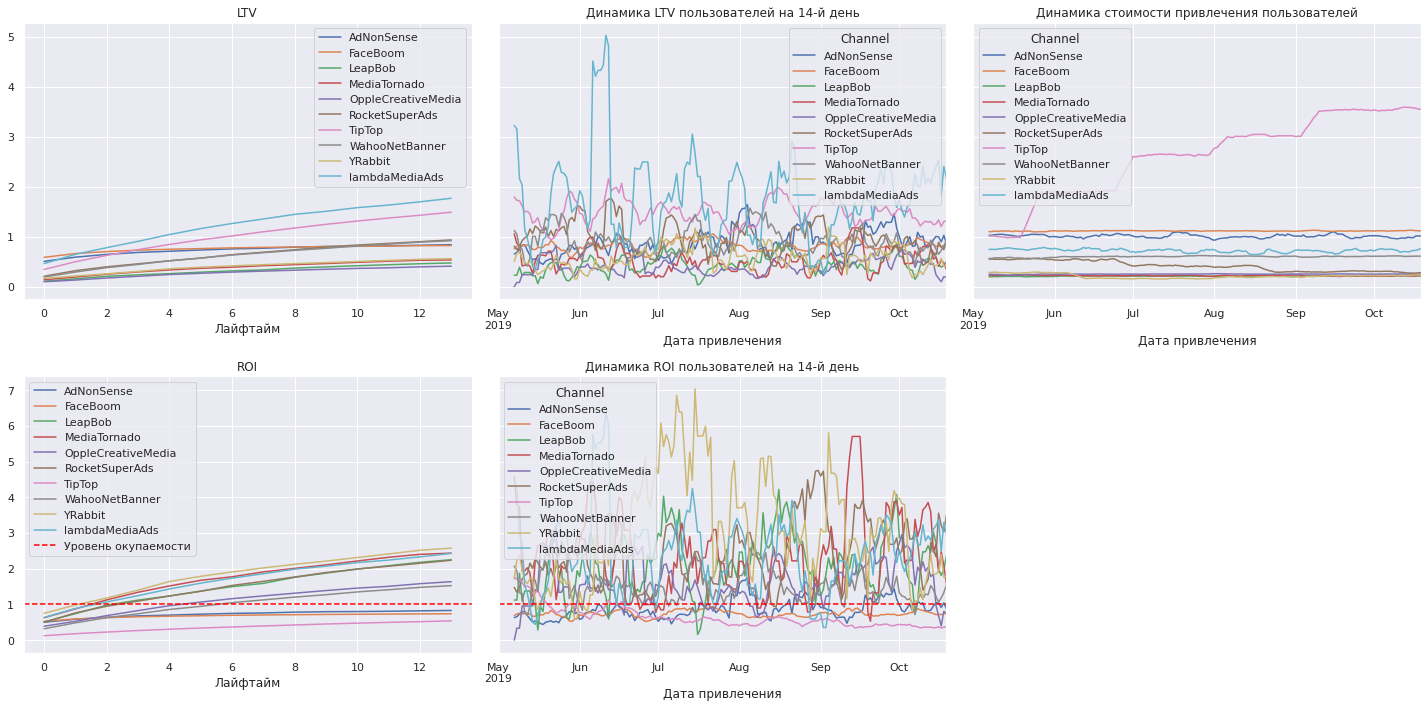

In [61]:
prof_raw, ltv, ltv_time, roi, roi_time = get_ltv(profiles.query('Channel!="organic"'), orders, datetime(2019,11,1).date(), 14, dimensions=['Channel'])
plot_ltv_roi(ltv, ltv_time, roi, roi_time, 14, window=7)

<div class="alert alert-info"> 
  Рекламные вложения через каналы Tip-Top, FaceBoom и AdNonSense, которые входят в топ-3 каналов с самым высоким CAC, практически
не окупаются. При этом, каналы Tip-Top, FaceBoom - лидеры по объемам рекламных вливаний. Вложения же через каналы с максимальным
удельным CAC (величина обратная произведению САС и объема рекламных вливаний) YRabbit, MediaTornado и lambdaMediaAds окупаются 
уже на 2 - 3 день. Вложения в остальные каналы с промежуточным значением удельного САС также 
полностью окупаются в течение первой недели. Пользователи, привлеченные самыми интенсивно 
финансируемыми каналами, не приносят нужный объем выручки для окупаемости рекламных расходов.
</div>

   ##  Оценка вклада слабых измерений (страна - США, девайсы - iPhone и Mac, каналы - Tip-Top, FaceBoom и AdNonSense) на эффективность рекламных вложений
<a id="weak"></a>


In [62]:
prof_dev = profiles.query('Channel!="organic"').groupby(['Region','Device']).agg({'User Id':'count'})
prof_dev['sum'] = prof_dev['User Id']
prof_dev.reset_index(inplace= True )
for i in prof_dev['Region'].unique():
    prof_dev.loc[prof_dev['Region']==i, 'sum'] = prof_dev.loc[prof_dev['Region']==i, 'User Id'].sum()
prof_dev['ratio'] = prof_dev['User Id']*100/prof_dev['sum']
prof_dev.sort_values(by = ['Region','ratio'], ascending = False)

,Region,Device,User Id,sum,ratio
15,United States,iPhone,27548,61829,44.555144
13,United States,Mac,15424,61829,24.946223
12,United States,Android,12436,61829,20.113539
14,United States,PC,6421,61829,10.385094
10,UK,PC,4551,11154,40.801506
8,UK,Android,3243,11154,29.074771
11,UK,iPhone,2274,11154,20.387305
9,UK,Mac,1086,11154,9.736417
6,Germany,PC,3797,9528,39.850966
4,Germany,Android,2849,9528,29.901343


In [63]:
ratio_USA_i = (prof_dev['User Id'][15] + prof_dev['User Id'][13]+prof_dev['User Id'][12])*100/prof_dev.loc[prof_dev['Region']=='United States', 'User Id'].sum()
ratio_USA_i

89.61490562680943

In [64]:
ratio_USA = prof_dev.loc[prof_dev['Region']=='United States', 'User Id'].sum()*100/prof_dev['User Id'].sum()
ratio_USA

66.07850890786479

<div class="alert alert-info"> 
   Из всех девайсов рекламные вложения окупаются только для пользователей PC. Кроме того, из всех стран реклама не окупается только
в США. Совокупная доля пользователей iPhone, Mac и Android в США занимает около 90 %, что очевидно объясняет низкую эффективность рекламных
вложений в эту страну. В остальных странах большинство пользователей предпочитают PC, реклама на которых хорошо окупается, 
что является причиной окупаемости рекламы во всех этих странах, кроме США, где предпочитают iPhone и Mac. 
  Общая доля американских пользователей среди всех стран преобладает и составляет 66 %, поэтому США со своими предпочтениями
к iPhone, Mac и Android не позволяет окупиться общей рекламной компании.   
</div>

In [65]:
prof_dev = profiles.query('Channel!="organic"').groupby(['Channel','Device']).agg({'User Id':'count'})
prof_dev.reset_index(inplace= True )
prof_dev['sum'] = prof_dev['User Id']
for i in prof_dev['Channel'].unique():
    prof_dev.loc[prof_dev['Channel']==i, 'sum'] = prof_dev.loc[prof_dev['Channel']==i, 'User Id'].sum()
prof_dev.query('Channel != "organic"').sort_values(by = ['sum','User Id'], ascending = False)

,Channel,Device,User Id,sum
7,FaceBoom,iPhone,12996,29144
5,FaceBoom,Mac,7265,29144
4,FaceBoom,Android,5875,29144
6,FaceBoom,PC,3008,29144
27,TipTop,iPhone,8840,19561
25,TipTop,Mac,4820,19561
24,TipTop,Android,3889,19561
26,TipTop,PC,2012,19561
18,OppleCreativeMedia,PC,3496,8605
16,OppleCreativeMedia,Android,2526,8605


<div class="alert alert-info"> 
   Вполне ожидаемо, что наименее эффективные каналы (самые крупные расходы на рекламу и самый высокий САС) Tip-Top, FaceBoom 
специализируются на неэффективных iPhone, Mac и Android. Третий неокупаемый канал AdNonSense специализируется на
 PC и Android (однако, доля пользователей этого канала, использующих iPhone, Mac и Android примерно
в 1,5 раза больше, чем пользователей с PC). В то же время, наиболее эффективные каналы с низким САС YRabbit и MediaTornado 
также специализируются на 'неэффективных' iPhone и Mac. Поэтому наблюдаемую низкую эффективность рекламной кампании сложно свести только к какой-то 
технической проблеме с устройствами iPhone, Mac или Android.
</div>

In [66]:
prof_dev = profiles.query('Channel!="organic"').groupby(['Channel','Region']).agg({'User Id':'count'})
prof_dev.reset_index(inplace= True )
prof_dev['sum'] = prof_dev['User Id']
for i in prof_dev['Channel'].unique():
    prof_dev.loc[prof_dev['Channel']==i, 'sum'] = prof_dev.loc[prof_dev['Channel']==i, 'User Id'].sum()
prof_dev.query('Channel != "organic"').sort_values(by = ['sum','User Id'], ascending = False)

,Channel,Region,User Id,sum
3,FaceBoom,United States,29144,29144
12,TipTop,United States,19561,19561
10,OppleCreativeMedia,UK,3052,8605
8,OppleCreativeMedia,France,2991,8605
9,OppleCreativeMedia,Germany,2562,8605
6,LeapBob,UK,3046,8553
15,WahooNetBanner,UK,3003,8553
4,LeapBob,France,2988,8553
13,WahooNetBanner,France,2971,8553
14,WahooNetBanner,Germany,2579,8553


<div class="alert alert-info"> 
  Рекламно неэффективные каналы Tip-Top, FaceBoom ожидаемо локализованы в рекламно неэффективных США. Однако, третий 
неокупаемый канал AdNonSense не имеет отношения к США и работает в эффективных странах - Франции, Англии и Германии. В то же 
время, наиболее быстро окупаемые каналы YRabbit и MediaTornado также локализованы в США. Это говорит о том, что проблема 
окупаемости связана не с типом девайса или страной пользователя, а с неэффективностью 2 рекламных каналов Tip-Top и FaceBoom, 
которые полностью доминируют среди клиентской базы, а также в США и у пользователей iPhone и Mac, что и приводит к 
неокупаемости рекламы в когортах, связанных с этими измерениями и рекламной кампании в целом. 
</div>

<div class="alert alert-info"> 

  ###  Конверсия и удержание по регионам
 

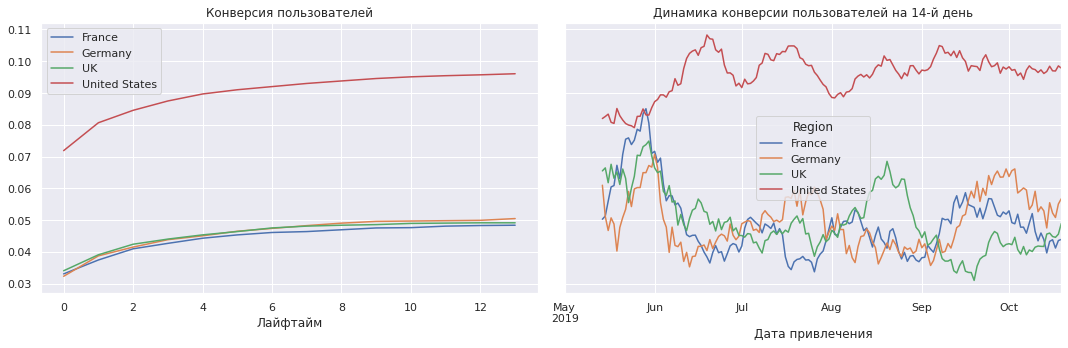

In [67]:
prof_raw, conversion, conversion_time = get_conversion(profiles.query('Channel!="organic"'), orders, datetime(2019,11,1).date(), 14, dimensions=['Region'])
plot_conversion(conversion, conversion_time, 14, window=14)

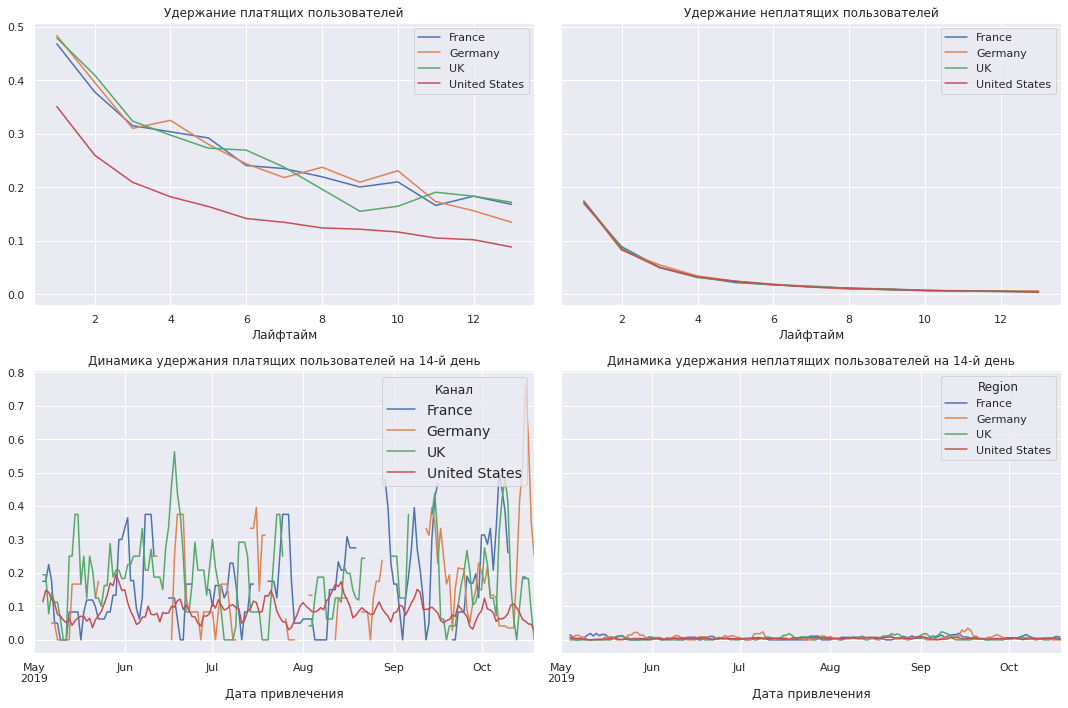

In [68]:
prof_raw, retention, retention_time = get_retention(profiles.query('Channel!="organic"'), visits.query('Channel!="organic"'), datetime(2019,11,1).date(), 14, dimensions=['Region'])
plot_retention(retention, retention_time, 14, window = 4)

<div class="alert alert-info"> 
    Самая высокая конверсия в США, поэтому нет оснований считать, что неокупаемость рекламы в США 
связана с какими-то административными ограничениями в этой стране. Скорее неокупаемость рекламы 
в США связана с неадекватно низким коэффициентом удержания, что объясняется либо проблемами с 
конверсией на доминирующих устройствах (iPhone, Mac), либо на доминирующих каналах (Tic-Toc и FaceBoomm)  


<div class="alert alert-info"> 

  ###  Конверсия и удержание по спектуру устройств
 

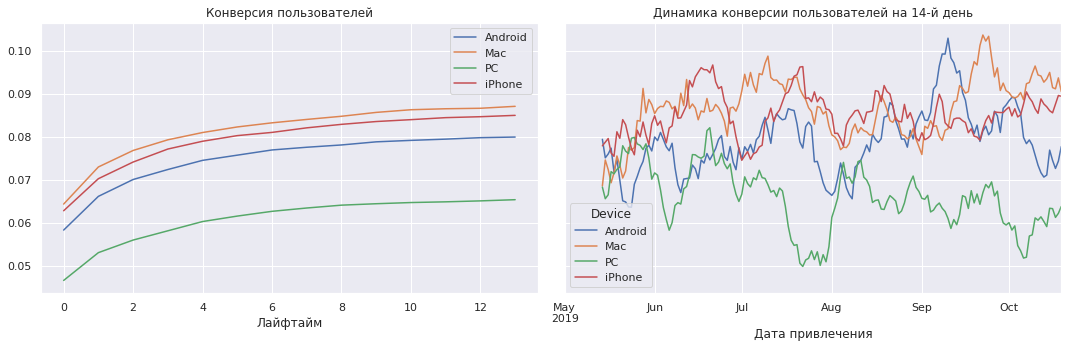

In [69]:
prof_raw, conversion, conversion_time = get_conversion(profiles.query('Channel!="organic"'), orders, datetime(2019,11,1).date(), 14, dimensions=['Device'])
plot_conversion(conversion, conversion_time, 14, window=14)

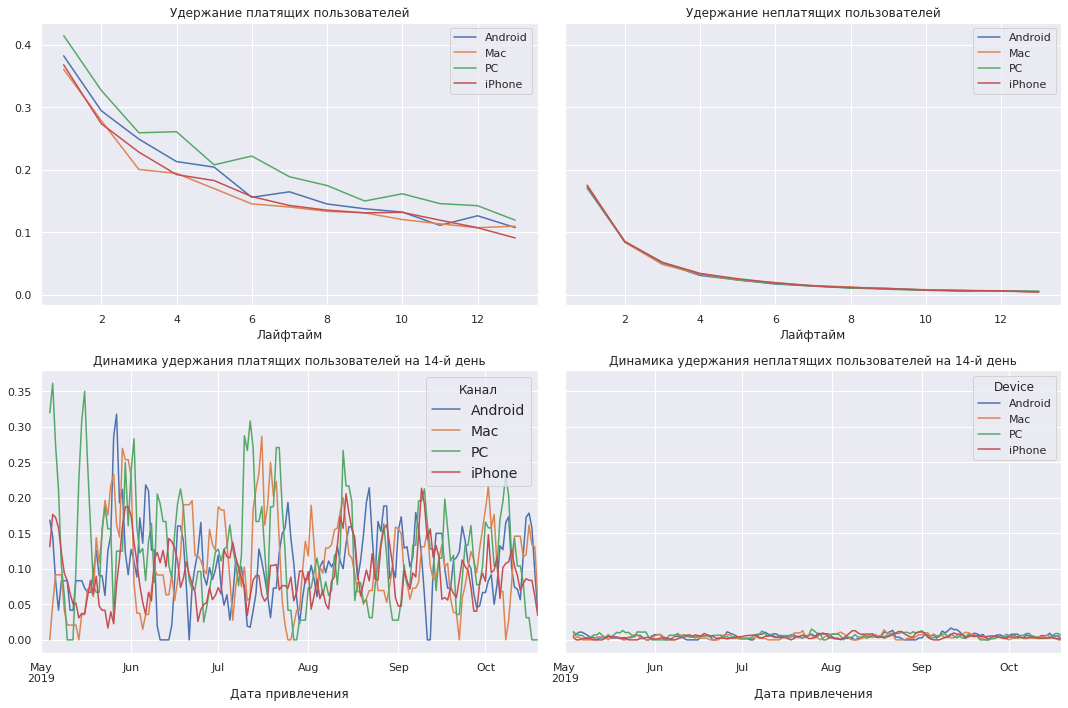

In [70]:
prof_raw, retention, retention_time = get_retention(profiles.query('Channel!="organic"'), visits.query('Channel!="organic"'), datetime(2019,11,1).date(), 14, dimensions=['Device'])
plot_retention(retention, retention_time, 14, window = 4)

<div class="alert alert-info"> 
    Из всех типов устройств именно окупаемый PC имеет самую низкую конверсию. Удержание для всех
типов устройств наъодится на одном уровне. Это говорит о том, что неокупаемость iPhone, Mac и Android
связана не с какими-то техническими особенностями этих устройств, а с рекламными каналами.

<div class="alert alert-info"> 

  ###  Конверсия и удержание по рекламным каналам
 

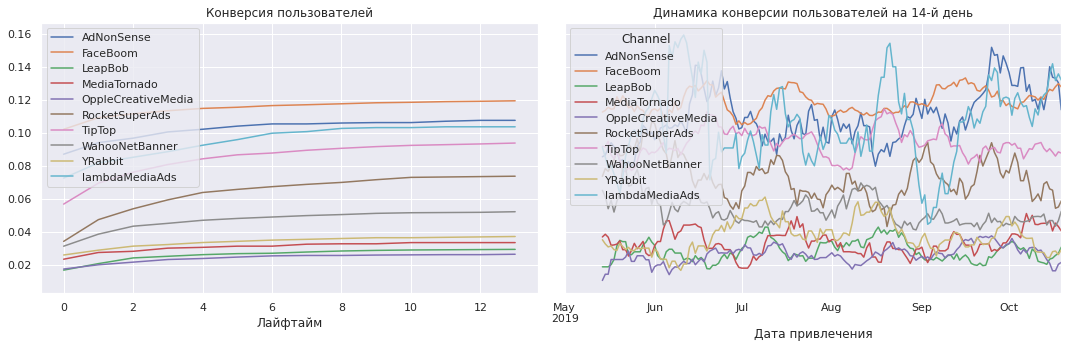

In [71]:
prof_raw, conversion, conversion_time = get_conversion(profiles.query('Channel!="organic"'), orders, datetime(2019,11,1).date(), 14, dimensions=['Channel'])
plot_conversion(conversion, conversion_time, 14, window=14)

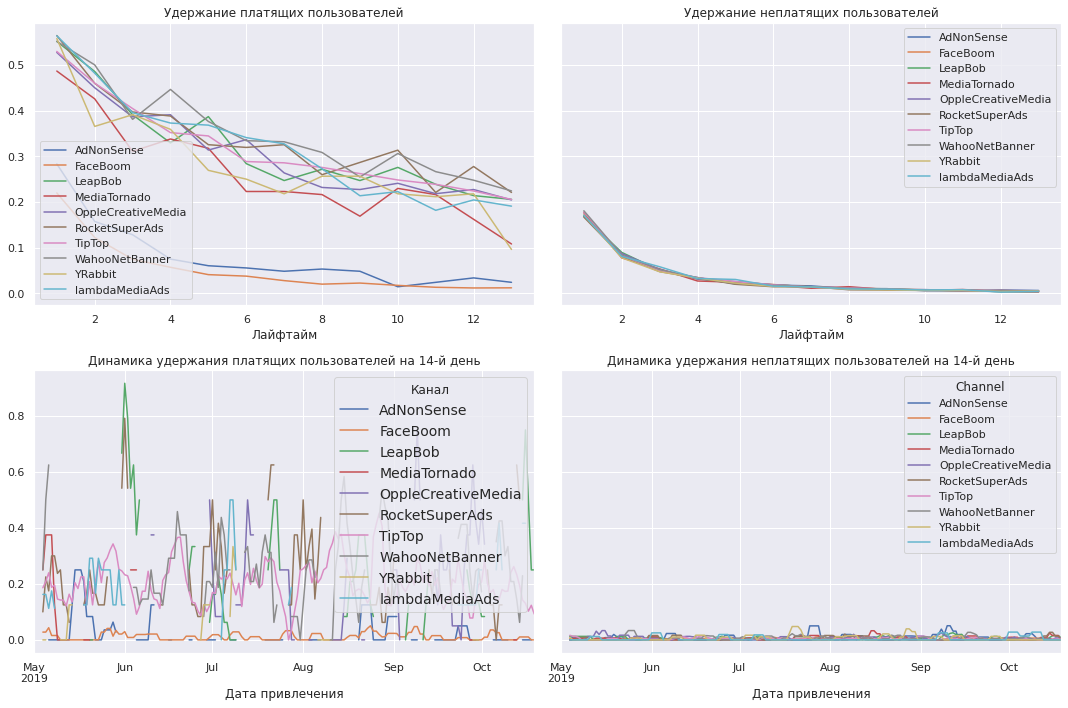

In [72]:
prof_raw, retention, retention_time = get_retention(profiles.query('Channel!="organic"'), visits.query('Channel!="organic"'), datetime(2019,11,1).date(), 14, dimensions=['Channel'])
plot_retention(retention, retention_time, 14, window = 4)

<div class="alert alert-info"> 
  Изучение диаграмм конверсии показвает, что проблемные каналы Tip-Top, FaceBoom и AdNonSense характеризуются хорошей конверсией 
и вместе с наименее задействованным каналом lambdaMediaAds образуют 4 лучших конвертируемых канала. Каналы же YRabbit и MediaTornado
с минимальным значением фактора СС конвертируются довольно плохо (7 и 8 места из всех каналов).   
  Анализ фактора RR показывает, что каналы FaceBoom и AdNonSense, не смотря на высокий уровень конверсии, характеризуются 
низким удержанием: пользователи, привлеченные этими каналами делают покупки в течение буквально первых 1 - 3 лайф-таймов, а к 
четвертому лайф-тайму посещаемость ресурса падапет до нуля. Таким образом, неокупаемость рекламы через каналы FaceBoom и AdNonSense
связана с неадекватно низким удержанием привлеченных пользователей. Неокупаемость второго по числу привлеченных пользователей 
канала Tip-Top связана с неадекватно завышенным коэффициентом САС, который более, чем в 2,5 раза выше, чем у лидера привлечения
FaceBoom: вливания в канал Tip-Top в 1,78 раза выше, чем в канал FaceBoom, но при этом FaxeBoom привлекает в 1,5 раза больше
клиентов, чем Tip-Top.
</div>

<div class="alert alert-info"> 
<a id="conc"></a>

### Выводы:
   1. Рекламные вложения через каналы Tip-Top, FaceBoom и AdNonSense, которые входят в топ-3 каналов с самым высоким CAC, 
практически не окупаются. При этом, каналы Tip-Top, FaceBoom - лидеры по объемам рекламных вливаний. Вложения же через каналы 
с максимальным удельным CAC (величина обратная произведению САС и объема рекламных вливаний) YRabbit и MediaTornado окупаются
уже на 2 - 3 день. Вложения в остальные каналы с промежуточным значением удельного САС также полностью окупаются в течение 
первой недели. Пользователи, привлеченные самыми интенсивно финансируемыми каналами, не приносят нужный объем выручки для
окупаемости рекламных расходов.
   2. Из всех девайсов рекламные вложения окупаются только для пользователей PC. Кроме того, из всех стран реклама не окупается только
в США. Совокупная доля пользователей iPhone, Mac и Android в США занимает около 90 %, что очевидно объясняет низкую эффективность рекламных
вложений в эту страну. В остальных странах большинство пользователей предпочитают PC, реклама на которых хорошо окупается, 
что является причиной окупаемости рекламы во всех этих странах, кроме США, где предпочитают iPhone и Mac. 
  Общая доля американских пользователей среди всех стран преобладает и составляет 66 %, поэтому США со своими предпочтениями
к iPhone, Mac и Android не позволяет окупиться общей рекламной компании.   
   3. Наименее эффективные каналы (самые крупные расходы на рекламу и самый высокий САС) Tip-Top и FaceBoom специализируются
на iPhone и Mac. Однако, третий неокупаемый канал AdNonSense, наоборот, специализируется на PC и Android. В то же время,
каналы с низким САС YRabbit и MediaTornado также специализируются на "неэффективных" iPhone и Mac. Поэтому наблюдаемую низкую
эффективность рекламной компании сложно свести только к какой-то технической проблеме с устройствами iPhone и Mac. 
   4. Рекламно неэффективные каналы Tip-Top, FaceBoom локализованы в США. Однако, третий неокупаемый канал AdNonSense не имеет
отношения к США и работает в эффективных странах - Франции, Англии и Германии. В то же время, наиболее быстро окупаемые каналы
YRabbit и MediaTornado также локализованы в США. Это говорит о том, что проблема окупаемости связана не с типом девайса или
страной пользователя, а с неэффективностью 2 рекламных каналов Tip-Top, FaceBoom, которые полностью доминируют среди клиентской
базы (а также в США и у пользователей iPhone и Mac), что и приводит к неокупаемости рекламы в когортах, связанных с этими 
измерениями (и неокупаемости рекламной кампании в целом). 
   5. Проблемные каналы Tip-Top, FaceBoom и AdNonSense характеризуются хорошей конверсией и вместе с наименее задействованным 
каналом lambdaMediaAds образуют 4 лучших конвертируемых канала. Каналы же YRabbit и MediaTornado с минимальным значением
фактора СС конвертируются довольно плохо (7 и 8 места из всех каналов). Каналы FaceBoom и AdNonSense, не смотря на высокий 
уровень конверсии, характеризуются низким удержанием: пользователи, привлеченные этими каналами делают покупки в течение 
буквально первых 1 - 3 дней, а к четвертому лайф-тайму посещаемость ресурса падапет до нуля. Таким образом, неокупаемость
рекламы через каналы FaceBoom и AdNonSense связана с неадекватно низким удержанием привлеченных пользователей. Неокупаемость
второго по числу привлеченных пользователей канала Tip-Top связана с неадекватно завышенным коэффициентом САС, который более, 
чем в 2,5 раза выше, чем у лидера привлечения FaceBoom: вливания в канал Tip-Top в 1,78 раза выше, чем в канал FaceBoom, но 
при этом FaxeBoom привлекает в 1,5 раза больше клиентов, чем Tip-Top.
</div>

<div class="alert alert-info"> 
<a id="review"></a>

### Рекомендации для отдела маркетинга:
   1. Разобраться с причиной низкого удержания клиентов, привлеченных каналами FaceBoom и AdNonSense. Возможно это связано с 
отсутствием бонусов первым клиентам или технической проблемой, которая после совершения первой покупки не позволяет клиентам
снова заходить на ресурс.
   2. Рассмотреть возможность увеличения вливаний в наименее финансируемый канал lambdaMediaAds, который имеет отличную 
конверсию (3 место среди всех каналов) и хорошее удержание.
   3. Пересмотреть условия сотрудничества с каналом Tip-Top в сторону снижения стоимости его услуг и, тем самым, снизить 
вливания в этот канал. Величины САС для данного канала не должна быть выше, чем у канала FaceBoom, то есть должна быть ниже 1,1.
   4. Для европейского рынка наибольшую перспективу имеют недооцененные каналы lambdaMediaAds (3 место
по конверсии и последнее по числу пользователей) и WahooNetBanner (6 место по величине конверсии и
4-5 место по числу пользователей). Также нужно развивать лучший по конверсии (2 место) европейский
канал AdNonSense, который имеет неадекватно низкое 9 место по числу пользователей. Все эти каналы
представлены во Франции, Германии и UK. 
   5. 2 из 4 наиболее конвертируемых рекламных каналов специализируются на США: Tic-Toc (4 место) и 
FaceBoom (1 место)). Наиболее недооценен американский канал RocketSuperAds: 5 место по уровню 
конверсии и 6 по величине аудитории.  